# First, let's see what's in this dataset

Data comes from insideAirbnb, which has a copy of the publically available data on airbnb's:website
`http://insideairbnb.com/get-the-data.html `

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [3]:
df = pd.read_csv('data/listings.csv')

/Users/dyawitz/anaconda/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
len(df)

35957

Let's look at all the unique columns to see what's in the data:

In [4]:
candy = df[df['id'] == 7095125]

In [5]:
candy

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
22575,7095125,https://www.airbnb.com/rooms/7095125,20160201235331,2016-02-02,Location Clean Large w Queen Bed,Your room is spacious & clean w/ a new queen b...,"[Note: For more availability date, also, check...",Your room is spacious & clean w/ a new queen b...,none,My apartment is at the borders of 4 awesome ne...,"The apartment resides in a walk-up building, 3...",4 subway stations are nearby from 3-8 mins wal...,https://a1.muscache.com/ac/pictures/93004551/1...,https://a1.muscache.com/im/pictures/93004551/1...,https://a1.muscache.com/im/pictures/93004551/1...,https://a1.muscache.com/im/pictures/93004551/1...,36656552,https://www.airbnb.com/users/show/36656552,Candy,2015-06-24,"New York, New York, United States",I was born in Hong Kong and grew up in the hea...,within an hour,100%,100%,f,https://a2.muscache.com/ac/users/36656552/prof...,https://a2.muscache.com/ac/users/36656552/prof...,Lower East Side,2,2,"['email', 'phone', 'facebook', 'google', 'link...",t,t,"Broome Street, New York, NY 10002, United States",Lower East Side,Lower East Side,Manhattan,New York,NY,10002,New York,"New York, NY",US,United States,40.718921,-73.992412,t,Apartment,Private room,3,1,1,2,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",NaN,$93.00,NaN,"$2,995.00",$250.00,$35.00,2,$30.00,2,1125,today,t,18,45,73,348,2016-02-02,30,2015-07-19,2016-01-08,88,9,10,9,9,9,9,f,NaN,NaN,t,moderate,f,f,2,4.52


In [8]:
df.columns

Index([u'id', u'listing_url', u'scrape_id', u'last_scraped', u'name',
       u'summary', u'space', u'description', u'experiences_offered'],
      dtype='object')

This is a ton! Let's extract all the ones I think might be relevant to predicting price, just to make the file a little smaller

In [9]:
table_names = ['name',\
            'summary',\
            'description',\
            'host_since',\
            'host_is_superhost',\
            'neighbourhood_cleansed', \
            'neighbourhood_group_cleansed', \
            'city', \
            'room_type',\
            'accommodates',\
            'bathrooms', \
            'bedrooms', \
            'beds', \
            'amenities',\
            'square_feet',\
            'extra_people',\
            'number_of_reviews',\
            'review_scores_value',\
            'review_scores_rating',\
            'price'
           ]

In [10]:
df_clean = df[table_names].copy()

And let's clean a few columns. Take out dollar signs and commas from price, set the 'superhost' columns to boolean

In [11]:
df_clean.price = df_clean['price'].apply(lambda x: float(x.replace('$', '').replace(',','')))
df_clean.extra_people = df_clean.extra_people.apply(lambda x: float(x.replace('$', '').replace(',','')))

df_clean['host_is_superhost'] = df_clean['host_is_superhost'].apply(lambda x: True if x == 't' else False)
df_clean['number_of_amenities'] = df_clean['amenities'].apply(lambda x: len(x))

Let's explore the relationships between our data with a scatter matrix:

In [12]:
from pandas.tools.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10dfe55d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x120a163d0>]], dtype=object)

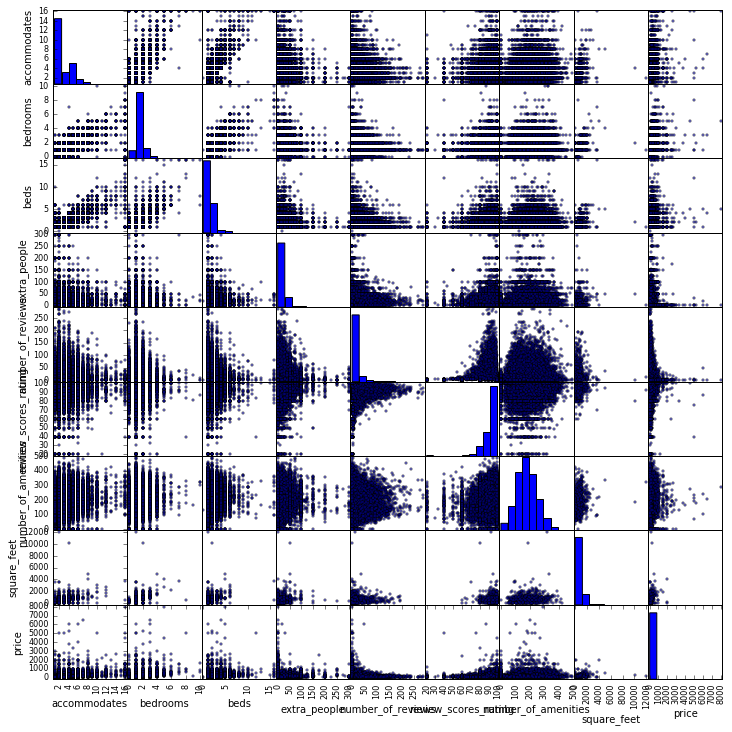

In [13]:
scatter_matrix(df_clean[['accommodates','bedrooms','beds','extra_people','number_of_reviews','review_scores_rating', 'number_of_amenities', 'square_feet','price']], figsize=(12,12))

That's exhausting. Let's see if we can predict a linear relationship with price:

In [14]:
from patsy import dmatrices

In [15]:
y,X = dmatrices('price ~ host_is_superhost + neighbourhood_group_cleansed + room_type + accommodates + bathrooms + \
                    bedrooms + beds + number_of_amenities + number_of_reviews + review_scores_rating', \
                data = df_clean, return_type='dataframe')

In [16]:
import statsmodels.api as sm

model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     1110.
Date:                Thu, 03 Mar 2016   Prob (F-statistic):               0.00
Time:                        21:03:57   Log-Likelihood:            -1.5900e+05
No. Observations:               26051   AIC:                         3.180e+05
Df Residuals:                   26036   BIC:                         3.182e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------------
Intercept                                       -90.8905      9.936     -9.147      0.000      -110.366   -71.415
host_is_superhost[T.True]                        14.1618      2.842      4.984      0.000         8.592    19.731
neighbourhood_group_cleansed[T.Brooklyn]         16.6231      6.464      2.572      0.010         3.954    29.292
neighbourhood_group_cleansed[T.Manhattan]        68.6302      6.455     10.631      0.000        55.977    81.283
neighbourhood_group_cleansed[T.Queens]            7.5067      6.822      1.100      0.271        -5.865    20.879
neighbourhood_group_cleansed[T.Staten Island]    25.1001     11.292      2.223      0.026         2.967    47.233
room_type[T.Private room]                       -72.4420      1.632    -44.384      0.000       -75.641   -69.243
room_type[T.Shared room]                        -91.8457      4.131    -22.235      0.000       -99.942   -83.749
accommodates                                     16.6634      0.752     22.149      0.000        15.189    18.138
bathrooms                                        68.8848      2.067     33.325      0.000        64.833    72.936
bedrooms                                         39.6662      1.443     27.486      0.000        36.838    42.495
beds                                             -9.0360      1.170     -7.720      0.000       -11.330    -6.742
number_of_amenities                               0.0509      0.010      5.006      0.000         0.031     0.071
number_of_reviews                                -0.1577      0.027     -5.819      0.000        -0.211    -0.105
review_scores_rating                              0.6610      0.076      8.672      0.000         0.512     0.810
==============================================================================
Omnibus:                    55780.704   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        556886748.527
Skew:                          18.687   Prob(JB):                         0.00
Kurtosis:                     718.294   Cond. No.                     4.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Not much of an R-squared, but that makes sense. There's a pretty big price range for any class of listing. 

Also, airbnb has a great price predictor already on its booking site. And they use machine learning to give hosts a great sense of how likely people will be to book their property.  

/Users/dyawitz/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/Users/dyawitz/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:14: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator


[24134.092086787387, 20946.978302413143, 18670.468456431565, 17304.562548842623, 16849.26057964631, 16877.837575576057, 16931.163876616989, 17018.539723645648, 17134.492881698734, 17276.960817515435, 17366.770549527566, 17430.333647524407, 17503.670868380821, 17586.781747815985, 17679.677613380372, 17782.312313620707, 17894.754887207455, 18000.988540231279, 18077.883952601489, 18160.452188343239]


/Users/dyawitz/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:454: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


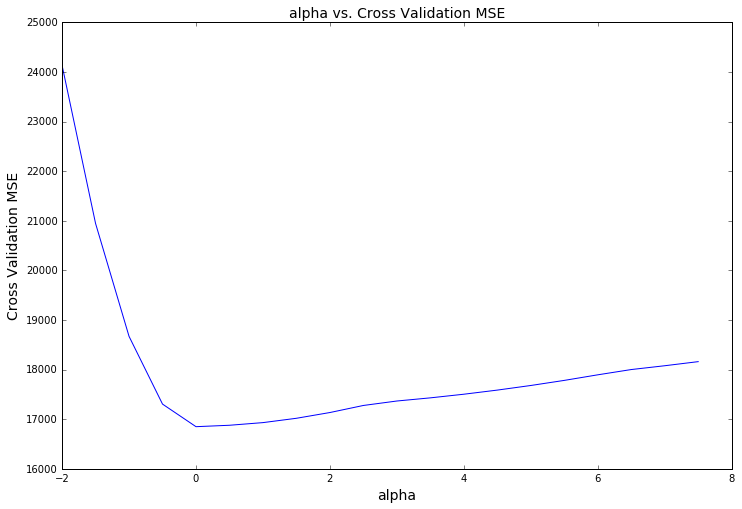

In [17]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

avg_MSE = []
alphas = np.linspace(-2, 8, 20, endpoint=False)
alphas
for alpha in alphas:
    MSE = []
#     for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
    #model = sm.OLS(X_train, y_train)
    model = Lasso(alpha=alpha)
    model.fit(X_test, y_test)
    test_error = mean_squared_error(y_test, model.predict(X_test))
    MSE.append(test_error)
    avg_MSE.append(np.mean(MSE))
print avg_MSE

plt.figure(figsize=(12,8))
plt.xlabel('alpha', fontsize=14)
plt.ylabel('Cross Validation MSE', fontsize=14)
plt.title('alpha vs. Cross Validation MSE', fontsize=14)
plt.plot(alphas, avg_MSE)


I can use this info with the data in `reviews.csv`

Let's take a subset and export it

In [18]:
relevant = ['id',\
            'host_id',\
            'host_name',\
            'host_is_superhost',\
            
            'host_since',\
            
            'name',\
            'neighbourhood_cleansed', \
            'neighbourhood_group_cleansed', \
            'city', \
            
            'price',\
            
            'room_type',\
            'accommodates',\
            'bathrooms', \
            'bedrooms', \
            'beds', \
            'amenities',\
            'description',\
            
            'first_review',\
            'last_review',\
            'number_of_reviews',\
            'review_scores_value',\
            'review_scores_rating'\
           ]

In [19]:
df[relevant].to_csv('data/listing_info.csv', index=False)

In [20]:
# df.groupby(['name','month'])['text'].apply(lambda x: ','.join(x)).reset_index()


In [21]:
# df_clean['neighbourhood_cleansed']

# df_clean.neighbourhood_cleansed.apply(pd.value_counts).plot(kind='bar')